### Importing Important Library

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

### Extracting data from Rapidapi

In [2]:
import requests

url = "https://covid-193.p.rapidapi.com/statistics"

headers = {
	"X-RapidAPI-Key": "2558d26ba6msh1c4f695862c1917p1c36bajsnbaf9f82d4dae",
	"X-RapidAPI-Host": "covid-193.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

data1=response.json()['response']

#### Converting into dataframe

In [3]:
data=pd.DataFrame(data1)

##### Extracting important features from adata

In [4]:
new_case=[]
active=[]
critical=[]
recovered=[]
OneM_pop=[]
total_case=[]

for i in range(238):
        new_case.append(data1[i]['cases']['new'])
        active.append(data1[i]['cases']['active'])
        critical.append(data1[i]['cases']['critical'])
        recovered.append(data1[i]['cases']['recovered'])
        OneM_pop.append(data1[i]['cases']['1M_pop'])
        total_case.append(data1[i]['cases']['total'])    

In [5]:
new_death=[]
oneM_pop_death=[]
total_death=[]

for i in range(238):
        new_death.append(data1[i]['deaths']['new'])
        oneM_pop_death.append(data1[i]['deaths']['1M_pop'])
        total_death.append(data1[i]['deaths']['total'])

In [6]:
oneM_pop_test=[]
total_test=[]

for i in range(238):
        oneM_pop_test.append(data1[i]['tests']['1M_pop'])
        total_test.append(data1[i]['tests']['total'])

In [7]:
df=pd.DataFrame(data1)

In [8]:
df.head()

,continent,country,population,cases,deaths,tests,day,time
0,North-America,Greenland,56973.0,"{'new': None, 'active': 9189, 'critical': 4, '...","{'new': None, '1M_pop': '369', 'total': 21}","{'1M_pop': '2894810', 'total': 164926}",2023-08-13,2023-08-13T01:45:09+00:00
1,Asia,Yemen,31154867.0,"{'new': None, 'active': 662, 'critical': 23, '...","{'new': None, '1M_pop': '69', 'total': 2159}","{'1M_pop': '10579', 'total': 329592}",2023-08-13,2023-08-13T01:45:09+00:00
2,Africa,Eritrea,3662244.0,"{'new': None, 'active': 0, 'critical': None, '...","{'new': None, '1M_pop': '28', 'total': 103}","{'1M_pop': '6470', 'total': 23693}",2023-08-13,2023-08-13T01:45:09+00:00
3,Africa,Niger,26083660.0,"{'new': None, 'active': 729, 'critical': 1, 'r...","{'new': None, '1M_pop': '12', 'total': 312}","{'1M_pop': '9759', 'total': 254538}",2023-08-13,2023-08-13T01:45:09+00:00
4,North-America,Antigua-and-Barbuda,99509.0,"{'new': None, 'active': 6, 'critical': 1, 'rec...","{'new': None, '1M_pop': '1467', 'total': 146}","{'1M_pop': '189943', 'total': 18901}",2023-08-13,2023-08-13T01:45:09+00:00


In [9]:
df['new_case'],df['active'],df['critical'],df['recovered'],df['OneM_pop'],df['total_case']=new_case,active,critical,recovered,OneM_pop,total_case

In [10]:
df['new_death'],df['oneM_pop_death'],df['total_death']=new_death,oneM_pop_death,total_death

In [11]:
df['oneM_pop_test'],df['total_test']=oneM_pop_test,total_test

In [12]:
df.drop(columns=['cases','deaths','tests'], inplace=True)

In [13]:
df['day']= pd.to_datetime(df['day'])

In [14]:
df['time']=pd.to_datetime(df['time'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   continent       236 non-null    object             
 1   country         238 non-null    object             
 2   population      229 non-null    float64            
 3   day             238 non-null    datetime64[ns]     
 4   time            238 non-null    datetime64[ns, UTC]
 5   new_case        103 non-null    object             
 6   active          218 non-null    float64            
 7   critical        126 non-null    float64            
 8   recovered       216 non-null    float64            
 9   OneM_pop        230 non-null    object             
 10  total_case      238 non-null    int64              
 11  new_death       30 non-null     object             
 12  oneM_pop_death  225 non-null    object             
 13  total_death     233 non-null    flo

##### Checking Null values

In [16]:
df.isnull().sum()

continent           2
country             0
population          9
day                 0
time                0
new_case          135
active             20
critical          112
recovered          22
OneM_pop            8
total_case          0
new_death         208
oneM_pop_death     13
total_death         5
oneM_pop_test      25
total_test         25
dtype: int64

In [17]:
df.fillna(0,inplace=True)

##### After droping null values, now i dont have any null values

In [18]:
df.isnull().sum()

continent         0
country           0
population        0
day               0
time              0
new_case          0
active            0
critical          0
recovered         0
OneM_pop          0
total_case        0
new_death         0
oneM_pop_death    0
total_death       0
oneM_pop_test     0
total_test        0
dtype: int64

In [19]:
df

,continent,country,population,day,time,new_case,active,critical,recovered,OneM_pop,total_case,new_death,oneM_pop_death,total_death,oneM_pop_test,total_test
0,North-America,Greenland,56973.0,2023-08-13,2023-08-13 01:45:09+00:00,0,9189.0,4.0,2761.0,210117,11971,0,369,21.0,2894810,164926.0
1,Asia,Yemen,31154867.0,2023-08-13,2023-08-13 01:45:09+00:00,0,662.0,23.0,9124.0,383,11945,0,69,2159.0,10579,329592.0
2,Africa,Eritrea,3662244.0,2023-08-13,2023-08-13 01:45:09+00:00,0,0.0,0.0,10086.0,2782,10189,0,28,103.0,6470,23693.0
3,Africa,Niger,26083660.0,2023-08-13,2023-08-13 01:45:09+00:00,0,729.0,1.0,8890.0,381,9931,0,12,312.0,9759,254538.0
4,North-America,Antigua-and-Barbuda,99509.0,2023-08-13,2023-08-13 01:45:09+00:00,0,6.0,1.0,8954.0,91509,9106,0,1467,146.0,189943,18901.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Asia,Asia,0.0,2023-08-13,2023-08-13 01:45:06+00:00,+1,15122480.0,15138.0,202966919.0,0,219637921,0,0,1548522.0,0,0.0
234,Europe,Europe,0.0,2023-08-13,2023-08-13 01:45:06+00:00,0,1785330.0,5443.0,245914080.0,0,249768472,0,0,2069062.0,0,0.0
235,All,All,0.0,2023-08-13,2023-08-13 01:45:06+00:00,+1,21027453.0,37335.0,665251771.0,88929,693186371,0,886.1,6907147.0,0,0.0
236,Asia,S-Korea,51329899.0,2023-08-13,2023-08-13 01:45:06+00:00,0,563350.0,185.0,32955713.0,653702,33554474,0,690,35411.0,307892,15804065.0


In [20]:
df.drop(237, inplace=True)

In [21]:
df[['new_case','OneM_pop','new_death','oneM_pop_death','oneM_pop_test']]=df[['new_case','OneM_pop','new_death','oneM_pop_death','oneM_pop_test']].astype('float')

In [22]:
df

,continent,country,population,day,time,new_case,active,critical,recovered,OneM_pop,total_case,new_death,oneM_pop_death,total_death,oneM_pop_test,total_test
0,North-America,Greenland,56973.0,2023-08-13,2023-08-13 01:45:09+00:00,0.0,9189.0,4.0,2761.0,210117.0,11971,0.0,369.0,21.0,2894810.0,164926.0
1,Asia,Yemen,31154867.0,2023-08-13,2023-08-13 01:45:09+00:00,0.0,662.0,23.0,9124.0,383.0,11945,0.0,69.0,2159.0,10579.0,329592.0
2,Africa,Eritrea,3662244.0,2023-08-13,2023-08-13 01:45:09+00:00,0.0,0.0,0.0,10086.0,2782.0,10189,0.0,28.0,103.0,6470.0,23693.0
3,Africa,Niger,26083660.0,2023-08-13,2023-08-13 01:45:09+00:00,0.0,729.0,1.0,8890.0,381.0,9931,0.0,12.0,312.0,9759.0,254538.0
4,North-America,Antigua-and-Barbuda,99509.0,2023-08-13,2023-08-13 01:45:09+00:00,0.0,6.0,1.0,8954.0,91509.0,9106,0.0,1467.0,146.0,189943.0,18901.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,North-America,North-America,0.0,2023-08-13,2023-08-13 01:45:06+00:00,0.0,2471025.0,6046.0,123313971.0,0.0,127426465,0.0,0.0,1641469.0,0.0,0.0
233,Asia,Asia,0.0,2023-08-13,2023-08-13 01:45:06+00:00,1.0,15122480.0,15138.0,202966919.0,0.0,219637921,0.0,0.0,1548522.0,0.0,0.0
234,Europe,Europe,0.0,2023-08-13,2023-08-13 01:45:06+00:00,0.0,1785330.0,5443.0,245914080.0,0.0,249768472,0.0,0.0,2069062.0,0.0,0.0
235,All,All,0.0,2023-08-13,2023-08-13 01:45:06+00:00,1.0,21027453.0,37335.0,665251771.0,88929.0,693186371,0.0,886.1,6907147.0,0.0,0.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   continent       237 non-null    object             
 1   country         237 non-null    object             
 2   population      237 non-null    float64            
 3   day             237 non-null    datetime64[ns]     
 4   time            237 non-null    datetime64[ns, UTC]
 5   new_case        237 non-null    float64            
 6   active          237 non-null    float64            
 7   critical        237 non-null    float64            
 8   recovered       237 non-null    float64            
 9   OneM_pop        237 non-null    float64            
 10  total_case      237 non-null    int64              
 11  new_death       237 non-null    float64            
 12  oneM_pop_death  237 non-null    float64            
 13  total_death     237 non-null    flo

In [24]:
df.to_csv('Covid19.csv', index=False)

In [25]:
df['continent']=df['continent'].replace(0,'Ship')

In [26]:
df['continent'].unique()

array(['North-America', 'Asia', 'Africa', 'South-America', 'Ship',
       'Europe', 'Oceania', 'All'], dtype=object)

In [27]:
df.head()

,continent,country,population,day,time,new_case,active,critical,recovered,OneM_pop,total_case,new_death,oneM_pop_death,total_death,oneM_pop_test,total_test
0,North-America,Greenland,56973.0,2023-08-13,2023-08-13 01:45:09+00:00,0.0,9189.0,4.0,2761.0,210117.0,11971,0.0,369.0,21.0,2894810.0,164926.0
1,Asia,Yemen,31154867.0,2023-08-13,2023-08-13 01:45:09+00:00,0.0,662.0,23.0,9124.0,383.0,11945,0.0,69.0,2159.0,10579.0,329592.0
2,Africa,Eritrea,3662244.0,2023-08-13,2023-08-13 01:45:09+00:00,0.0,0.0,0.0,10086.0,2782.0,10189,0.0,28.0,103.0,6470.0,23693.0
3,Africa,Niger,26083660.0,2023-08-13,2023-08-13 01:45:09+00:00,0.0,729.0,1.0,8890.0,381.0,9931,0.0,12.0,312.0,9759.0,254538.0
4,North-America,Antigua-and-Barbuda,99509.0,2023-08-13,2023-08-13 01:45:09+00:00,0.0,6.0,1.0,8954.0,91509.0,9106,0.0,1467.0,146.0,189943.0,18901.0


In [28]:
con_popu=df[['country','population']]

In [29]:
con_popu= con_popu.sort_values(by='population',ascending=False)

In [30]:
con_popu=con_popu.set_index('country')

In [31]:
con_popu[:20]

,population
country,
China,1.448471e+09
India,1.406632e+09
USA,3.348053e+08
Indonesia,2.791345e+08
Pakistan,2.294890e+08
Nigeria,2.167469e+08
Brazil,2.153536e+08
Bangladesh,1.678857e+08
Russia,1.458059e+08


#### Here we can see the Total tested of country

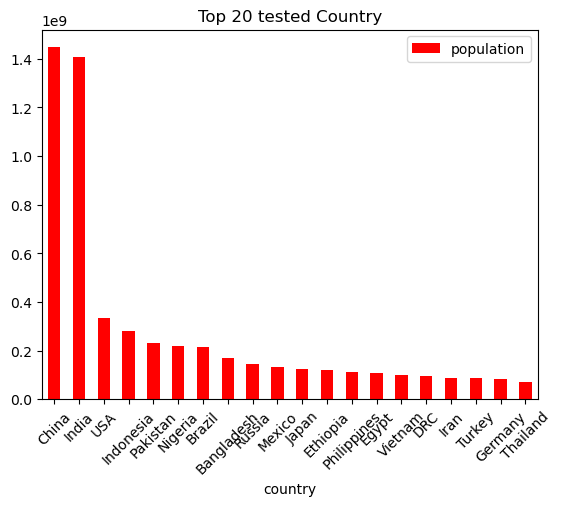

In [32]:
con_popu[:20].plot(kind='bar',color='red')
plt.title('Top 20 tested Country')
plt.xticks(rotation=45)
plt.show()

#### I have collected some important Keys for our model which is important for us.

In [33]:
df1=df[['population','total_death','total_test','active']]

In [34]:
df1

,population,total_death,total_test,active
0,56973.0,21.0,164926.0,9189.0
1,31154867.0,2159.0,329592.0,662.0
2,3662244.0,103.0,23693.0,0.0
3,26083660.0,312.0,254538.0,729.0
4,99509.0,146.0,18901.0,6.0
...,...,...,...,...
232,0.0,1641469.0,0.0,2471025.0
233,0.0,1548522.0,0.0,15122480.0
234,0.0,2069062.0,0.0,1785330.0
235,0.0,6907147.0,0.0,21027453.0


In [35]:
df1.isnull().sum()

population     0
total_death    0
total_test     0
active         0
dtype: int64

In [36]:
df1.describe(percentiles=[.01,.02,.03,.9,.92,.93,.94,.95,.96,.97,.98]).T

,count,mean,std,min,1%,2%,3%,50%,90%,92%,93%,94%,95%,96%,97%,98%,max
population,237.0,3.323391e+07,1.364101e+08,0.0,0.0,0.00,0.00,5323993.0,57834240.6,71734850.16,85783189.28,98359501.16,114169734.8,1.289325e+08,1.661193e+08,2.203147e+08,1.448471e+09
total_death,237.0,8.646786e+04,5.041922e+05,0.0,0.0,0.72,1.08,2179.0,85686.0,122812.04,144572.36,166725.84,197167.2,3.011103e+05,5.213582e+05,1.224301e+06,6.907147e+06
total_test,237.0,2.732881e+07,1.089521e+08,0.0,0.0,0.00,0.00,1499795.0,47655186.8,66587909.56,78906403.72,98080749.40,115793612.0,1.464992e+08,1.976932e+08,2.720249e+08,1.181255e+09
active,237.0,2.079503e+05,1.691658e+06,0.0,0.0,0.00,0.00,498.0,73363.6,104984.28,117214.20,145255.48,377723.4,5.308930e+05,7.835699e+05,1.054351e+06,2.102745e+07


In [37]:
df1=df1[df1.population<100000000]
df1.shape

(223, 4)

<AxesSubplot:xlabel='population'>

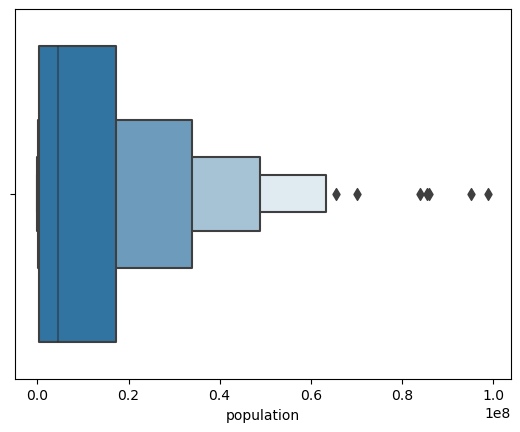

In [38]:
sns.boxenplot(data=df1, x='population')

<AxesSubplot:>

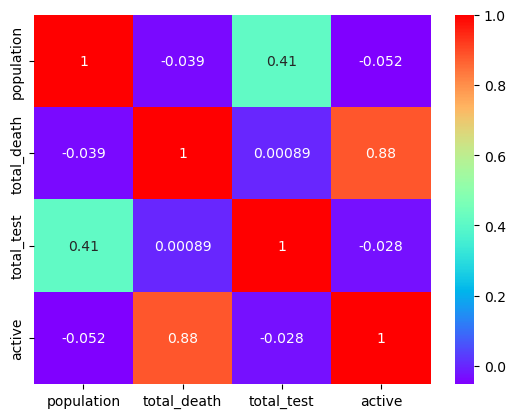

In [39]:
sns.heatmap(df1.corr(),annot=True, cmap="rainbow")

C:\Users\Manish kumar\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_death', ylabel='Density'>

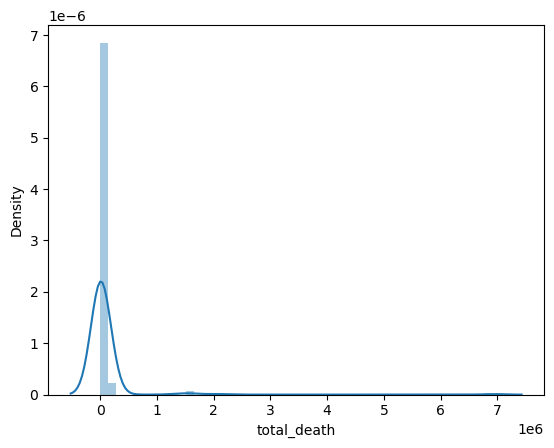

In [40]:
sns.distplot(df1['total_death'])

#### Selecting target value

In [41]:
x=df1.drop(columns=['total_death'])
y= df1['total_death']

In [42]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.1,random_state=5)

In [43]:
scale= StandardScaler()

In [44]:
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [45]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [46]:
rf=RandomForestRegressor()
rf.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [47]:
laso=Lasso(alpha=0.01)
laso.fit(x_train_scaled,y_train)

Lasso(alpha=0.01)

In [48]:
ridge = Ridge(alpha=1.0) 
ridge.fit(x_train_scaled,y_train)

Ridge()

In [49]:
svr= SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(x_train_scaled,y_train)

SVR()

In [50]:
ada= AdaBoostRegressor(learning_rate=0.001,base_estimator=rf)
ada.fit(x_train_scaled,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(), learning_rate=0.001)

In [51]:
variable_imp=pd.DataFrame({"Var": x_train.columns, "imp":rf.feature_importances_}).sort_values(by="imp", ascending=False)

In [52]:
variable_imp

,Var,imp
2,active,0.952813
0,population,0.025774
1,total_test,0.021414


#### Model Evaluation

In [53]:
def eval(model, xtrain, ytrain, xtest, ytest):
    acc=model.score(xtrain, ytrain)
    pred_train=model.predict(xtrain)
    rmse_train = np.sqrt(mean_squared_error(ytrain, pred_train))
    mse_train = mean_squared_error(ytrain, pred_train)
    mae_train = mean_absolute_error(ytrain, pred_train)
   
    acctest=model.score(xtest, ytest)
    pred_test=model.predict(xtest)
    rmse_test = np.sqrt(mean_squared_error(ytest, pred_test))
    mse_test = mean_squared_error(ytest, pred_test)
    mae_test = mean_absolute_error(ytest, pred_test)
    r2 = r2_score(ytest, pred_test)
    final={"train_accuracy":acc, "test_accuracy":acctest, "rmse_train":rmse_train,"rmse_test":rmse_test,
           "mse_train":mse_train,"mse_test":mse_test,"mse_train":mae_train,"mse_test":mse_test,"mae_train":mae_train,
           "mse_test":mae_test,"R Square":r2
          }
    return final

In [54]:
Lr=pd.DataFrame(eval(lr,x_train_scaled,y_train,x_test_scaled,y_test),index=['LinearRegressior'])

In [55]:
Rf=pd.DataFrame(eval(rf,x_train_scaled,y_train,x_test_scaled,y_test),index=['RandomForest'])

In [56]:
Laso=pd.DataFrame(eval(laso,x_train_scaled,y_train,x_test_scaled,y_test),index=['Laso'])

In [57]:
Ridge=pd.DataFrame(eval(ridge,x_train_scaled,y_train,x_test_scaled,y_test),index=['Ridge'])

In [58]:
SVR=pd.DataFrame(eval(svr,x_train_scaled,y_train,x_test_scaled,y_test),index=['SVR'])

In [59]:
Ada=pd.DataFrame(eval(svr,x_train_scaled,y_train,x_test_scaled,y_test),index=['Adaboost'])

In [60]:
final=pd.concat([Lr, Rf, Laso,Ridge,SVR,Ada])
final.style.highlight_max(color="green")

,train_accuracy,test_accuracy,rmse_train,rmse_test,mse_train,mse_test,mae_train,R Square
LinearRegressior,0.780524,0.375686,251982.880291,41418.828827,62068.870266,27972.469567,62068.870266,0.375686
RandomForest,0.920028,0.283542,152106.261348,44370.222398,23591.388119,12099.127681,23591.388119,0.283542
Laso,0.780524,0.375686,251982.880291,41418.833849,62068.869852,27972.472223,62068.869852,0.375686
Ridge,0.780504,0.373103,251994.033062,41504.424057,62380.210754,28265.318004,62380.210754,0.373103
SVR,-0.022639,-0.079277,543924.161327,54458.121205,82381.117434,16780.905932,82381.117434,-0.079277
Adaboost,-0.022639,-0.079277,543924.161327,54458.121205,82381.117434,16780.905932,82381.117434,-0.079277


#### I have selected Regression model because our Target variable is continuous. And i have only few data so our model. 